In [1]:
# 먼저 필요한 패키지를 가져옵니다.

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt #차트

In [2]:
abalone_columns = list()
for l in open('abalone_attributes.txt'):
  abalone_columns.append(l.strip())

abalone_columns
data=pd.read_csv('abalone.txt', header=None,names=abalone_columns) #헤더를 줘야 알아보기 쉬우니까 그냥 줌

In [3]:
data

#우리가 알고 싶은 성별을 Label,
#성별을 추측하기 위한 다른 속성들을 Feature

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
label=data['Sex']

In [5]:
data.head() #앞 부분 5개 정도만 보여줌

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.shape #전체 데이터의 모양 알기(먼저 갯수 파악하고 시작하는 것이 좋다)

(4177, 9)

In [7]:
del data['Sex'] #삭제

In [8]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
#전체 데이터의 설명을 보자 (기초 통계량)
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
#전체 데이터의 형태를 보자
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [11]:
data = (data - np.min(data)) / (np.max(data) - np.min(data)) #수식보다는 Scaler 함수 사용하는게 좋음

In [12]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#사용하기 위해 객체화시키자
mMscaler=MinMaxScaler()

In [15]:
#mMscaler.fit(data) #스케일러에 데이터를 적용하는 작업

In [16]:
#mMscaled_data=mMscaler.transform(data) #데이터를 민맥스로 전환하는 작업

In [17]:
mMscaled_data=mMscaler.fit_transform(data) #위 두 작업을 한꺼번에 하기!

In [18]:
type(mMscaled_data) #우선 Numpy 데이터 배열로 바꿔서 하는 것이 통상적이다

numpy.ndarray

In [19]:
type(data) #판다스보다는 넘파이를 많이 사용!

pandas.core.frame.DataFrame

In [20]:
from sklearn.preprocessing import StandardScaler
sdscaler=StandardScaler()

In [21]:
sdscaled_data=sdscaler.fit_transform(data)

In [22]:
sdscaled_data #데이터를 표준정규분포화시켜 스케일링중

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [23]:
#실제 데이터를 솎아내는 것 -> 언더샘플링
#데이터를 확장하는 것 -> 오버샘플링

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

In [24]:
!pip install imblearn

In [25]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [26]:
data.shape

(4177, 8)

In [33]:
oversampled_data,oversampled_label=ros.fit_resample(data,label)
oversampled_data=pd.DataFrame(oversampled_data,columns=data.columns) #판다스 프레임으로 만들기

In [31]:
oversampled_data.shape

(4584, 8)

In [32]:
oversampled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4579,0.736486,0.731092,0.141593,0.376837,0.299260,0.323239,0.302441,0.357143
4580,0.682432,0.655462,0.110619,0.250576,0.203093,0.184332,0.232686,0.285714
4581,0.493243,0.487395,0.088496,0.128918,0.081372,0.118499,0.118087,0.428571
4582,0.290541,0.260504,0.061947,0.038782,0.031607,0.026333,0.028401,0.142857


In [34]:
undersampled_data,undersampled_label=rus.fit_resample(data,label)

In [35]:
undersampled_data.shape #랜덤으로 데이터를 솎아냄->이러한 경우는 잘 없음

(3921, 8)

In [39]:
from sklearn.datasets import make_classification
data, label = make_classification( #샘플을 만들려고 하니 많은 속성이 필요하다
    n_samples=1000,
    n_features=2,#x,y 두개의 좌표를 그려보겠다
    n_repeated=0, #반복은 하지 마라
    n_classes=3, #3개의 그룹으로 나눌것이며
    n_redundant=0, #보통 0으로 두고 쓴다
    n_clusters_per_class=1, #1개의 그룹에 1개의 클러스터만 들어간다
    weights=[0.05,0.15,0.8], # 클래스의 3개 그룹, 첫 번째 그룹엔 5프로, 두 번째는 15프로, 세 번째는 8프로
    class_sep=0.8, #기본값이 1이고, 값이 크면 클 수록 클래스가 겹쳐져있다(우리는 0.8이라 20퍼센트씩)
    random_state=2022 #랜덤 값
)

In [40]:
data.shape

(1000, 2)

In [41]:
data 

array([[-1.91117507,  0.90864868],
       [ 0.23908554, -1.9966176 ],
       [ 0.41063734, -1.09651695],
       ...,
       [-0.74729639, -1.06505046],
       [ 0.78391513, -1.6661851 ],
       [-0.04871935,  2.48764856]])

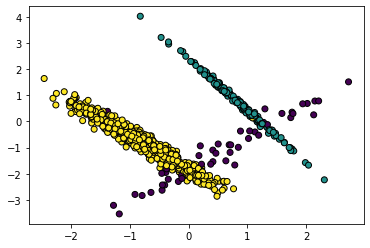

In [45]:
plt.scatter(data[:,0],data[:,1],c=label,linewidth=1,edgecolor='black')

In [46]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=5) #몇 개를 기준으로 할 것인가?

In [47]:
smoted_data,smoted_label=smote.fit_resample(data,label)

In [48]:
data.shape

(1000, 2)

In [49]:
smoted_data.shape

(2382, 2)

In [50]:
#각각의 클래스의 비율을 확인해보자(5%,15%,8% -> 데이터 불균형 상태)
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum())) #가장 많은 개수에 맞춰주는 smote 알고리즘

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


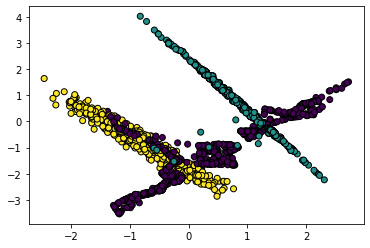

In [52]:
plt.scatter(smoted_data[:,0], smoted_data[:,1], #각자 x축, y축의 값을 준 것이다
            c=smoted_label, linewidth=1, edgecolor='black')

In [53]:
from sklearn.datasets import load_digits

In [56]:
digits=load_digits()

In [57]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [58]:
digits.data.shape

(1797, 64)

In [60]:
data=digits.data
label=digits.target

Label : 0


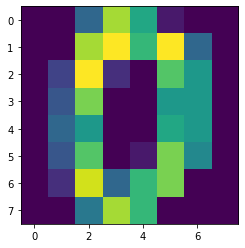

In [65]:
data[0].reshape(8,8) #8개씩 8개의 행으로 나오게 함 
plt.imshow(data[0].reshape(8,8))
print('Label : {}'.format(label[0]))

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #64개의 차원을 2차원으로 줄임

In [67]:
new_data = pca.fit_transform(data)

In [68]:
new_data.shape

(1797, 2)

In [69]:
new_data[0]

array([-1.259466  , 21.27487788])

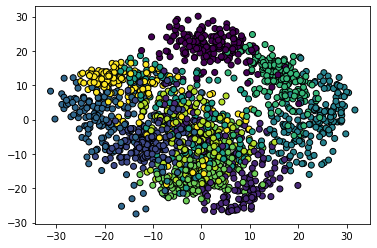

In [73]:
plt.scatter(new_data[:,0],new_data[:,1],c=label,#각각에게 색깔 주기
           linewidth=1,edgecolor='black')

In [79]:
  data = pd.read_csv('abalone.txt', header=None, 
                     names=abalone_columns)

In [81]:
label=data['Sex']

In [82]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [99]:
label_encoded_label = le.fit_transform(label)
label_encoded_label.reshape(-1,1) #-1,1로 하는 순간 배열 안에 배열들이 하나씩 들어가 있는 모양으로 바뀜

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [96]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded_label.reshape((-1, 1))], axis=1),
columns=['label', 'label_encoded'])

In [97]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


In [111]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False) #인자값을 True로 하면 Matrix, False로 하면 배열

In [112]:
one_hot_encoded=ohe.fit_transform(label.values.reshape(-1,1)) #-1,1로 바르게 펴주는 작업을 해야한다.

In [113]:
print(one_hot_encoded) #배열로 받는게 통상적!

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [114]:
from sklearn.datasets import load_wine
wine = load_wine()

In [115]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [117]:
data=wine.data
label=wine.target
columns=wine.feature_names

In [120]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [121]:
data.shape

(178, 13)

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [123]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [124]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #2차원으로 축소할 것이다
data=pca.fit_transform(data)

In [125]:
data.shape #2차원으로 줄어듦

(178, 2)

In [126]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3) #데이터에 라벨은 없는데 최대한 3등분하기

In [128]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [130]:
cluster=kmeans.predict(data)

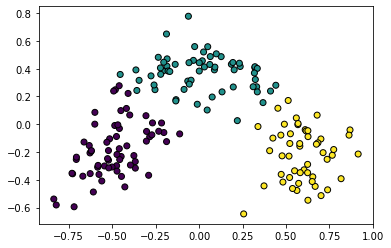

In [134]:
plt.scatter(data[:,0],data[:,1],c=cluster,linewidth=1,edgecolor='black')